## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [22]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [23]:
train, test = keras.datasets.cifar10.load_data()

In [24]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [25]:
y_test.shape

(10000, 10)

In [26]:
def build_mlp():
    """
    Try to build your own model
    """
    model = keras.Sequential()
    
    model.add(keras.layers.Dense(512, input_shape = (x_train.shape[-1], )))
    model.add(keras.layers.ReLU())
    
    model.add(keras.layers.Dense(256))
    model.add(keras.layers.ReLU())
    
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.PReLU())
    
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Softmax())
    
    return model
model = build_mlp()

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
re_lu_6 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
p_re_lu_5 (PReLU)            (None, 128)               128       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
__________

In [28]:
"""
Compile your model
"""
opt = keras.optimizers.SGD()
model.compile(opt, loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [29]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 63us/step - loss: 2.0676 - acc: 0.2658 - val_loss: 1.9511 - val_acc: 0.2968
Epoch 2/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.8836 - acc: 0.3360 - val_loss: 1.8955 - val_acc: 0.3189
Epoch 3/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.8125 - acc: 0.3620 - val_loss: 1.7853 - val_acc: 0.3742
Epoch 4/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.7700 - acc: 0.3749 - val_loss: 1.7648 - val_acc: 0.3830
Epoch 5/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.7339 - acc: 0.3897 - val_loss: 1.7296 - val_acc: 0.3891
Epoch 6/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.7073 - acc: 0.3992 - val_loss: 1.7066 - val_acc: 0.3907
Epoch 7/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.6781 - acc: 0.4082 - val_loss: 1.8153 - 

50000/50000 [==============================] - 2s 49us/step - loss: 1.1821 - acc: 0.5861 - val_loss: 1.4283 - val_acc: 0.4885
Epoch 60/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1746 - acc: 0.5905 - val_loss: 1.3204 - val_acc: 0.5323
Epoch 61/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.1681 - acc: 0.5917 - val_loss: 1.3331 - val_acc: 0.5283
Epoch 62/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1538 - acc: 0.5979 - val_loss: 1.5137 - val_acc: 0.4734
Epoch 63/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1600 - acc: 0.5939 - val_loss: 1.5224 - val_acc: 0.4773
Epoch 64/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.1503 - acc: 0.5980 - val_loss: 1.4126 - val_acc: 0.5024
Epoch 65/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.1430 - acc: 0.5996 - val_loss: 1.3480 - val_acc: 0.5236
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8591 - acc: 0.7026 - val_loss: 1.3177 - val_acc: 0.5498
Epoch 119/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8509 - acc: 0.7046 - val_loss: 1.3756 - val_acc: 0.5321
Epoch 120/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8405 - acc: 0.7085 - val_loss: 1.5588 - val_acc: 0.4992
Epoch 121/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8472 - acc: 0.7055 - val_loss: 1.4301 - val_acc: 0.5231
Epoch 122/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8394 - acc: 0.7089 - val_loss: 1.5402 - val_acc: 0.4968
Epoch 123/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.8347 - acc: 0.7119 - val_loss: 1.6220 - val_acc: 0.4863
Epoch 124/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.8302 - acc: 0.7132 - val_loss: 1.4906 - val_acc: 0.5062
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 50us/step - loss: 0.5655 - acc: 0.8070 - val_loss: 1.5828 - val_acc: 0.5305
Epoch 177/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.5617 - acc: 0.8090 - val_loss: 1.8201 - val_acc: 0.4960
Epoch 178/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.5511 - acc: 0.8154 - val_loss: 1.6645 - val_acc: 0.5159
Epoch 179/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.5503 - acc: 0.8129 - val_loss: 2.1141 - val_acc: 0.4597
Epoch 180/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.5633 - acc: 0.8099 - val_loss: 1.6140 - val_acc: 0.5221
Epoch 181/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.5409 - acc: 0.8170 - val_loss: 1.6435 - val_acc: 0.5186
Epoch 182/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.5433 - acc: 0.8154 - val_loss: 2.1839 - val_acc: 0.4465
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 0.3053 - acc: 0.9037 - val_loss: 1.8375 - val_acc: 0.5367
Epoch 235/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.2924 - acc: 0.9100 - val_loss: 1.8320 - val_acc: 0.5333
Epoch 236/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.3078 - acc: 0.9056 - val_loss: 1.8755 - val_acc: 0.5347
Epoch 237/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.3486 - acc: 0.8949 - val_loss: 1.8447 - val_acc: 0.5375
Epoch 238/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.2807 - acc: 0.9148 - val_loss: 2.7746 - val_acc: 0.4557
Epoch 239/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.3026 - acc: 0.9087 - val_loss: 1.9409 - val_acc: 0.5346
Epoch 240/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.3010 - acc: 0.9091 - val_loss: 2.1892 - val_acc: 0.5060
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 0.2211 - acc: 0.9441 - val_loss: 2.1518 - val_acc: 0.5470
Epoch 293/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1051 - acc: 0.9778 - val_loss: 2.2577 - val_acc: 0.5366
Epoch 294/500
50000/50000 [==============================] - 3s 51us/step - loss: 0.1029 - acc: 0.9794 - val_loss: 2.2428 - val_acc: 0.5374
Epoch 295/500
50000/50000 [==============================] - 3s 50us/step - loss: 0.1624 - acc: 0.9609 - val_loss: 2.1969 - val_acc: 0.5457
Epoch 296/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.1569 - acc: 0.9603 - val_loss: 2.1236 - val_acc: 0.5334
Epoch 297/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0933 - acc: 0.9825 - val_loss: 2.2581 - val_acc: 0.5312
Epoch 298/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0897 - acc: 0.9832 - val_loss: 2.3617 - val_acc: 0.5261
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 49us/step - loss: 0.0351 - acc: 0.9968 - val_loss: 2.5476 - val_acc: 0.5412
Epoch 351/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0344 - acc: 0.9967 - val_loss: 2.6227 - val_acc: 0.5322
Epoch 352/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.4822 - acc: 0.8790 - val_loss: 2.4789 - val_acc: 0.5418
Epoch 353/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0442 - acc: 0.9954 - val_loss: 2.5910 - val_acc: 0.5363
Epoch 354/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0384 - acc: 0.9964 - val_loss: 2.4939 - val_acc: 0.5456
Epoch 355/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0353 - acc: 0.9969 - val_loss: 2.5170 - val_acc: 0.5402
Epoch 356/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0337 - acc: 0.9973 - val_loss: 2.5514 - val_acc: 0.5376
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 3s 50us/step - loss: 0.0135 - acc: 0.9996 - val_loss: 2.8136 - val_acc: 0.5392
Epoch 409/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0136 - acc: 0.9995 - val_loss: 2.8184 - val_acc: 0.5424
Epoch 410/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0134 - acc: 0.9995 - val_loss: 2.8219 - val_acc: 0.5421
Epoch 411/500
50000/50000 [==============================] - 2s 50us/step - loss: 0.0137 - acc: 0.9992 - val_loss: 2.8357 - val_acc: 0.5431
Epoch 412/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0128 - acc: 0.9997 - val_loss: 2.8267 - val_acc: 0.5406
Epoch 413/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0125 - acc: 0.9996 - val_loss: 2.8891 - val_acc: 0.5417
Epoch 414/500
50000/50000 [==============================] - 2s 49us/step - loss: 0.0124 - acc: 0.9997 - val_loss: 2.8375 - val_acc: 0.5424
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0120 - val_acc: 0.5456
Epoch 467/500
50000/50000 [==============================] - 3s 52us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0104 - val_acc: 0.5418
Epoch 468/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.0162 - val_acc: 0.5418
Epoch 469/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0070 - acc: 0.9999 - val_loss: 3.0141 - val_acc: 0.5446
Epoch 470/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 3.0248 - val_acc: 0.5404
Epoch 471/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0067 - acc: 1.0000 - val_loss: 3.0269 - val_acc: 0.5422
Epoch 472/500
50000/50000 [==============================] - 3s 53us/step - loss: 0.0066 - acc: 0.9999 - val_loss: 3.0274 - val_acc: 0.5426
Epoch 473/500
50000/50000 [=======

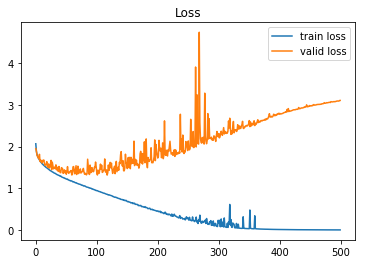

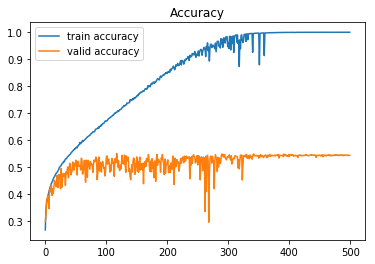

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()